In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('monthly-sunspots.csv')

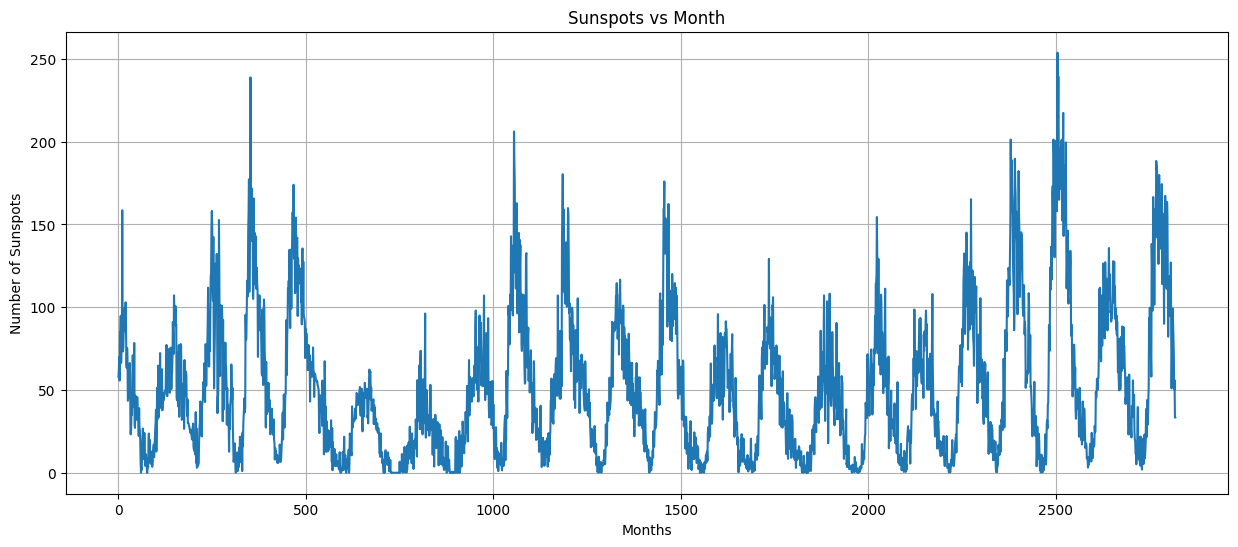

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [2]:
plt.figure(figsize=(15, 6))
plt.plot(df['Sunspots'], label='Monthly Sunspots')
plt.xlabel('Months')
plt.ylabel('Number of Sunspots')
plt.title('Sunspots vs Month')
plt.grid(True)
plt.show()
df.head()

## Normalizing and sequencing data

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
sunspots_normalized = scaler.fit_transform(df['Sunspots'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        target.append(data[i + sequence_length])
    return np.array(sequences), np.array(target)

sequence_length = 12
X, y = create_sequences(sunspots_normalized, sequence_length)

## Splitting data to train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2246, 12, 1), (562, 12, 1), (2246, 1), (562, 1))

# Desarrollo de la FFNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential(
    [
        Flatten(input_shape=(sequence_length, 1)),
        Dense(128, activation="softmax"),
        Dense(64, activation="relu"),
        Dense(1, activation="linear")
    ]
)

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               1664      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


# Entrenar la FFNN

In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
57/57 [==============================] - 1s 7ms/step - loss: 0.0323 - accuracy: 0.0212 - val_loss: 0.0277 - val_accuracy: 0.0200
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.0212 - val_loss: 0.0215 - val_accuracy: 0.0200
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.0212 - val_loss: 0.0105 - val_accuracy: 0.0200
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.0212 - val_loss: 0.0064 - val_accuracy: 0.0200
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.0212 - val_loss: 0.0061 - val_accuracy: 0.0200
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.0212 - val_loss: 0.0060 - val_accuracy: 0.0200
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.0212 - val_loss: 0.0058 - val_accuracy: 0.0200
Epoch 8/50
57/57 [==

# Probar la FFNN

In [7]:
loss = model.evaluate(X_test, y_test)
print('MSE:', loss[0])

18/18 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.0374
MSE: 0.004372300114482641


# Predictions FFNN

In [8]:
predictions = model.predict(X_test)
predictions_original_scale = scaler.inverse_transform(predictions)

18/18 [==============================] - 0s 2ms/step


# Plotting results

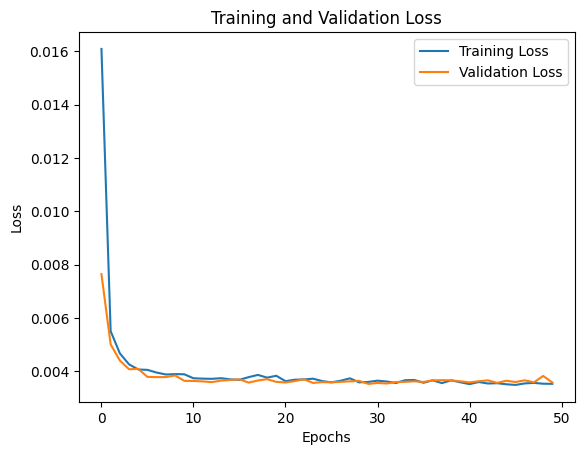

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

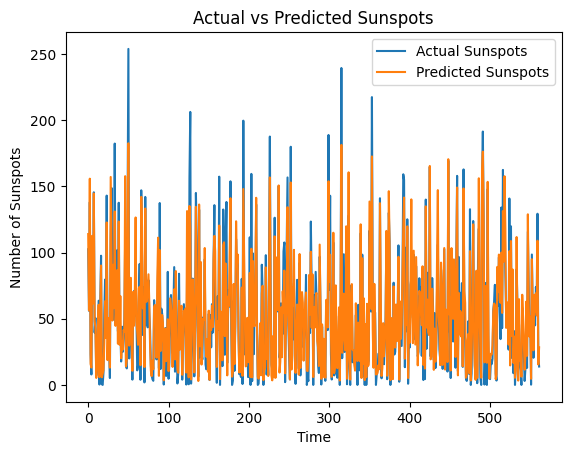

In [10]:
y_test_original_scale = scaler.inverse_transform(y_test)

plt.plot(y_test_original_scale, label='Actual Sunspots')
plt.plot(predictions_original_scale, label='Predicted Sunspots')
plt.xlabel('Time')
plt.ylabel('Number of Sunspots')
plt.title('Actual vs Predicted Sunspots')
plt.legend()
plt.show()

1/1 [==============================] - 0s 157ms/step


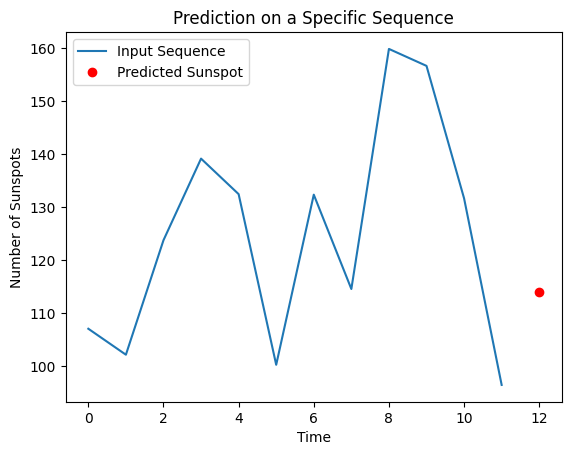

In [15]:
sequence_number = 0
sequence_prediction = model.predict(X_test[sequence_number].reshape(1, 12, 1))
sequence_prediction_original_scale = scaler.inverse_transform(sequence_prediction)
input_sequence_original_scale = scaler.inverse_transform(X_test[sequence_number])

plt.plot(input_sequence_original_scale, label='Input Sequence')
plt.plot([12], sequence_prediction_original_scale, 'ro', label='Predicted Sunspot')
plt.xlabel('Time')
plt.ylabel('Number of Sunspots')
plt.title('Prediction on a Specific Sequence')
plt.legend()
plt.show()